<a href="https://colab.research.google.com/github/sahealthsolutions/python_data_analysis_assignment/blob/main/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [3]:
users = pd.read_csv("/content/sample_data/users_data.csv")
cards = pd.read_csv("/content/sample_data/cards_data.csv")
transactions = pd.read_csv("/content/sample_data/transactions_data.csv")

print(users.shape, cards.shape, transactions.shape)

(25, 14) (75, 13) (50000, 12)


In [4]:
#Merge All Data
df = transactions.merge(
    users, left_on="client_id", right_on="id", how="left"
)

df = df.merge(
    cards, left_on="card_id", right_on="id", how="left",
    suffixes=("_user", "_card")
)

df.head()

,id_x,date,client_id_user,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,7475509,2010-01-01 04:45:00,1718,4706,$46.21,Online Transaction,15143,ONLINE,NaN,NaN,...,Debit,5191030913182493,06/2024,360,YES,1,$16055,09/2009,2009,No
1,7475582,2010-01-01 06:03:00,511,974,$3.33,Swipe Transaction,20519,Phoenix,AZ,85015.0,...,Debit (Prepaid),5117090980312402,10/2020,42,YES,1,$73,02/2000,2012,No
2,7475752,2010-01-01 06:52:00,1718,2029,$10.60,Swipe Transaction,20519,Spring Valley,CA,91977.0,...,Debit,5804499644308599,07/2023,258,NO,2,$27480,03/2002,2008,No
3,7475819,2010-01-01 07:08:00,511,1038,$21.50,Swipe Transaction,79038,Phoenix,AZ,85015.0,...,Credit,4150093118072730,06/2022,135,YES,2,$6100,02/2004,2009,No
4,7475828,2010-01-01 07:09:00,1094,3755,$80.00,Swipe Transaction,27092,Boyne City,MI,49712.0,...,Debit,5515782790823587,06/2023,419,YES,2,$18684,07/2006,2017,No


Customer Card profile

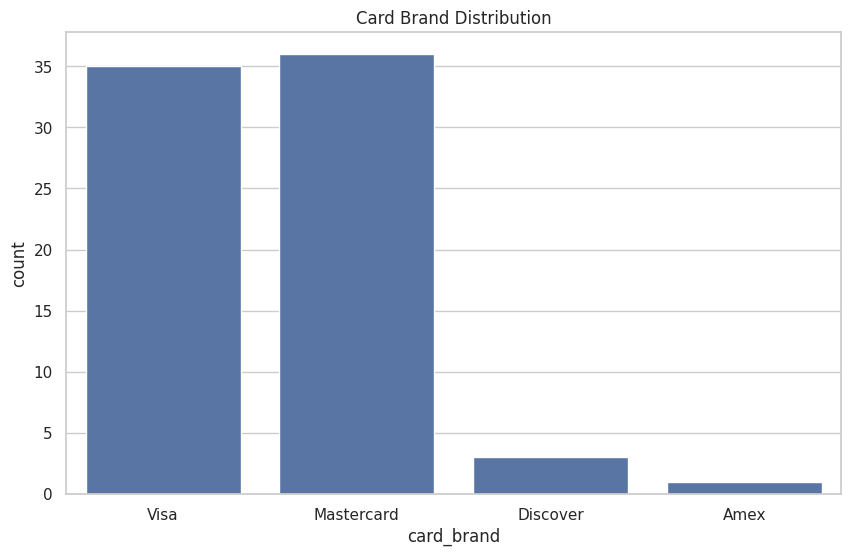

In [5]:
sns.countplot(data=cards, x="card_brand")
plt.title("Card Brand Distribution")
plt.show()

Card Type Distribution

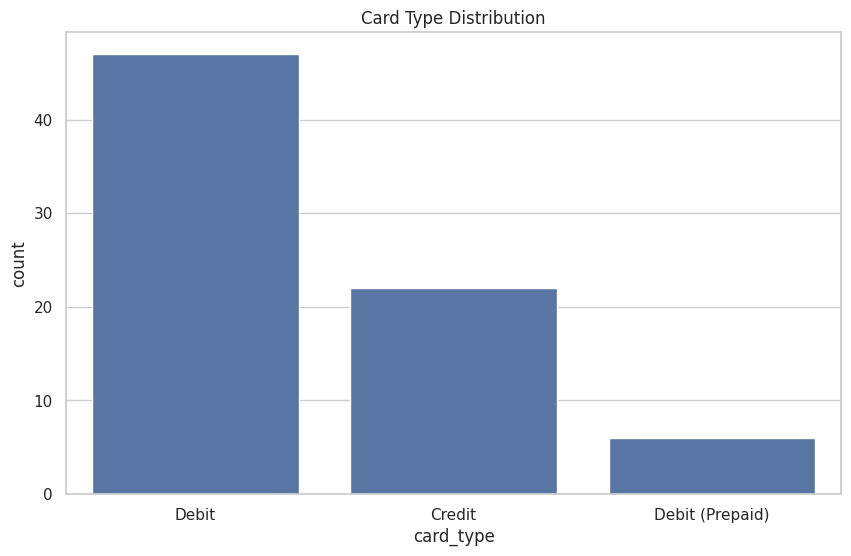

In [6]:
sns.countplot(data=cards, x="card_type")
plt.title("Card Type Distribution")
plt.show()


Credit Limit by Card Brand

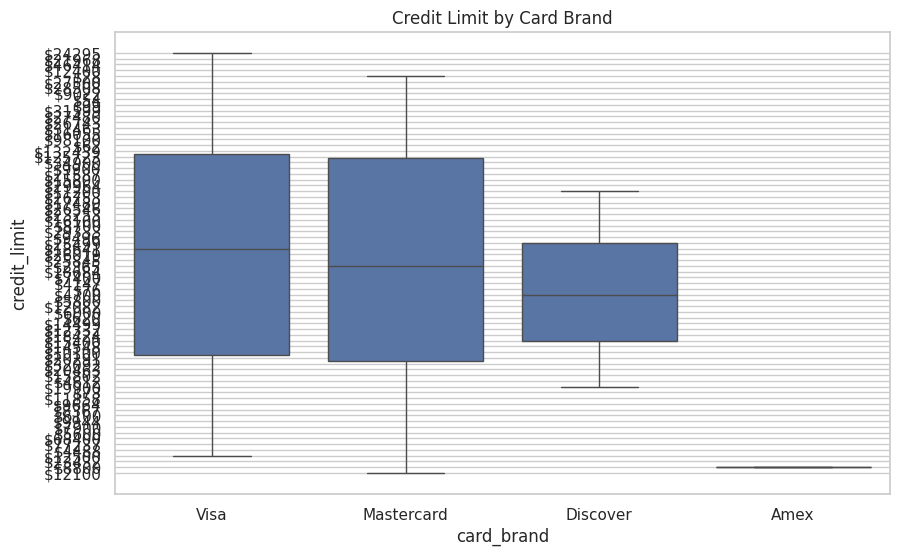

In [7]:
sns.boxplot(data=cards, x="card_brand", y="credit_limit")
plt.title("Credit Limit by Card Brand")
plt.show()

2. Explore Transactions:
• What is the time frame of the data collected’
• Which client has spent the most amount.
• Highest and lowest transactions amounts spent
• Transactions amounts within use_chip category
• Use appropriate Graphs and extract insights.

Time Frame of Data

In [8]:
print("Transaction Date Range:")
print(df["date"].min(), "to", df["date"].max())


Transaction Date Range:
2010-01-01 04:45:00 to 2012-10-29 12:55:00


HIghest and Lowest Transactions

In [9]:
print("Highest Transaction Amount:", df["amount"].max())
print("Lowest Transaction Amount:", df["amount"].min())


Highest Transaction Amount: $997.97
Lowest Transaction Amount: $-100.00


Client with highest spend

In [11]:
top_spender = df.groupby("client_id_user")["amount"].sum().idxmax()
print("Client with Highest Spend:", top_spender)

Client with Highest Spend: 1946


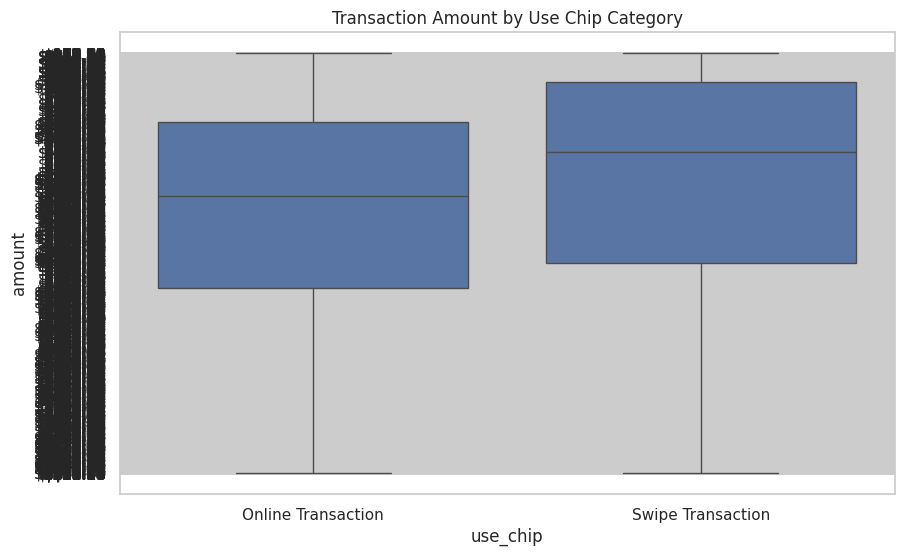

In [13]:
sns.boxplot(data=df, x="use_chip", y="amount")
plt.title("Transaction Amount by Use Chip Category")
plt.show()
#Online transactions show higher variance → higher risk exposure.

3. Customer Spend Profile vs. Credit Health

Spend Metrics per Client

In [17]:
df['amount'] = df['amount'].replace('[$,]', '', regex=True).astype(float)
spend_profile = df.groupby("client_id_user").agg(
    total_spend=("amount", "sum"),
    avg_ticket_size=("amount", "mean"),
    transaction_count=("amount", "count")
).reset_index()

spend_profile.head()

,client_id_user,total_spend,avg_ticket_size,transaction_count
0,68,202013.82,57.098310,3538
1,153,70806.08,55.447204,1277
2,511,285794.61,43.646092,6548
3,708,326179.31,132.917404,2454
4,825,259484.68,81.088962,3200


In [18]:
credit_health = users[[
    "id", "credit_score", "yearly_income",
    "total_debt", "num_credit_cards"
]]

Merge Spend & Credit Data

In [20]:
profile = spend_profile.merge(
    credit_health, left_on="client_id_user", right_on="id"
)


Scatter - Avg Spend vs Income

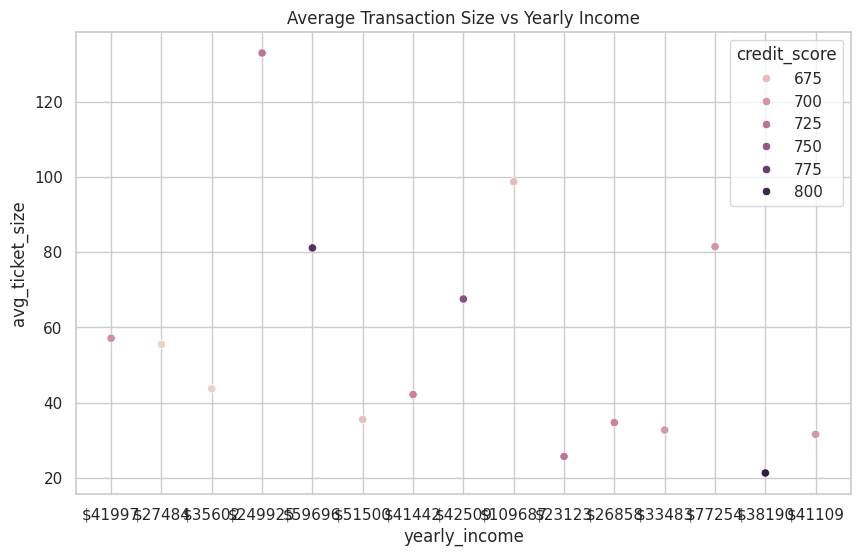

In [21]:
sns.scatterplot(
    data=profile,
    x="yearly_income",
    y="avg_ticket_size",
    hue="credit_score"
)
plt.title("Average Transaction Size vs Yearly Income")
plt.show()


Age Portfolio

Age Bands

In [22]:
users["age_band"] = pd.cut(
    users["current_age"],
    bins=[18,25,35,45,55,65,100],
    labels=["18-25","26-35","36-45","46-55","56-65","65+"]
)


Customer distribution by Age Band

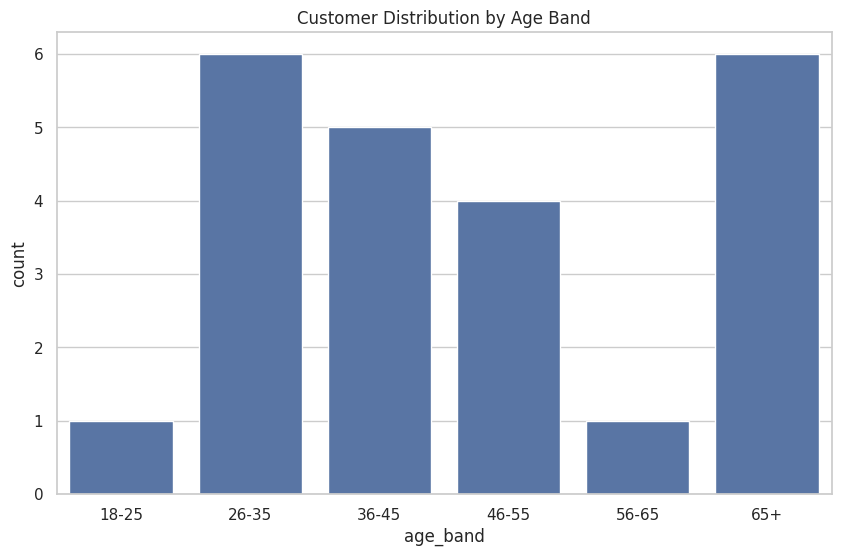

In [23]:
sns.countplot(data=users, x="age_band")
plt.title("Customer Distribution by Age Band")
plt.show()

Credit Limit by age band

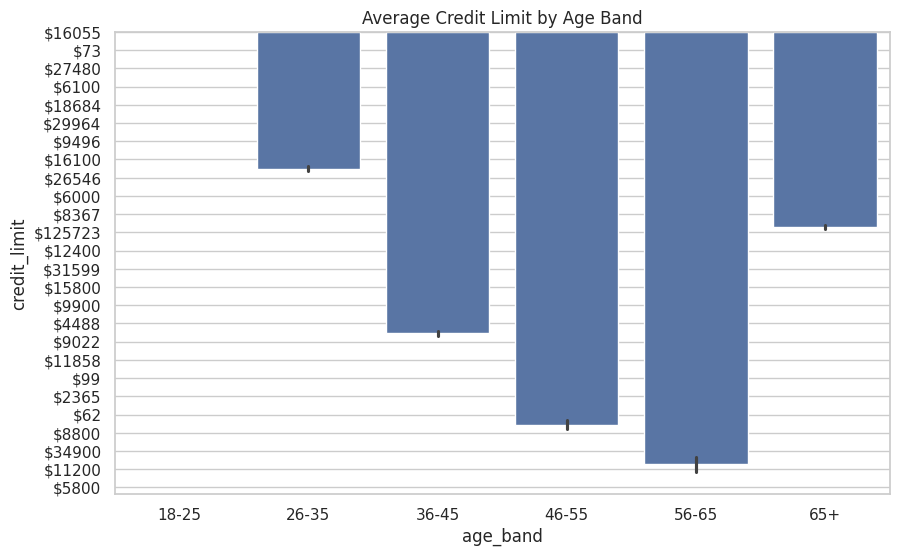

In [25]:
age_credit = df.merge(
    users[["id", "age_band"]],
    left_on="client_id_user",
    right_on="id",
    suffixes=('_df', '_users') # Explicitly add suffixes to resolve potential column name clashes
)

sns.barplot(data=age_credit, x="age_band", y="credit_limit")
plt.title("Average Credit Limit by Age Band")
plt.show()

Insights for above is


1.   Offer digital-first products to younger users
2.   Premium cards to mid-age users



**Gender Analysis**

Avg Transaction Amount by Gender

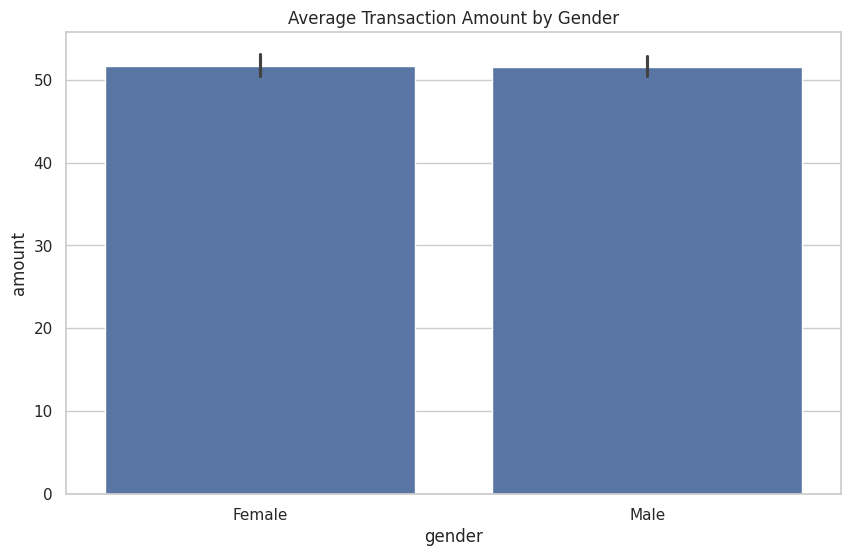

In [26]:
sns.barplot(data=df, x="gender", y="amount")
plt.title("Average Transaction Amount by Gender")
plt.show()


Time-of-Day Spending

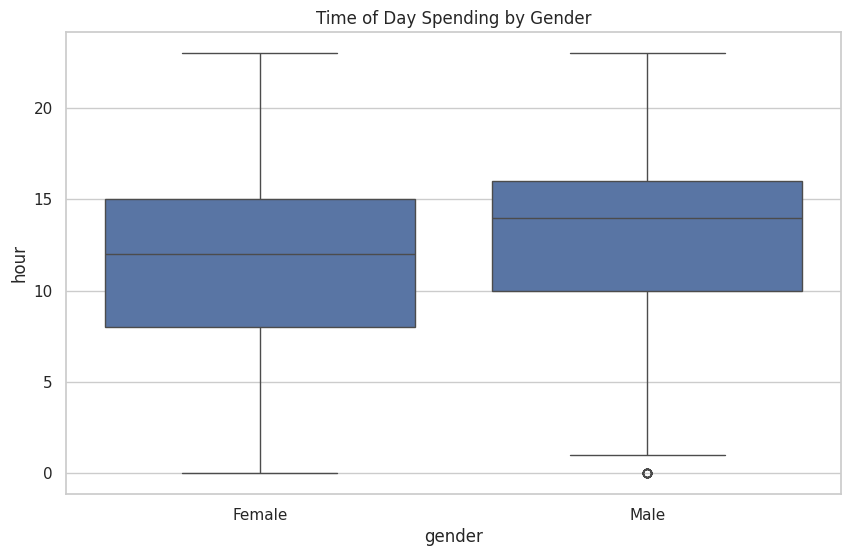

In [28]:
df['date'] = pd.to_datetime(df['date'])
df["hour"] = df["date"].dt.hour

sns.boxplot(data=df, x="gender", y="hour")
plt.title("Time of Day Spending by Gender")
plt.show()

Marketing Compaign Ideas


*   Weekend Cashback offers
*   Gender focused lifestyle compaigns
*   Night time spending rewards




